In [2]:
#Import relevant libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [3]:
#Fetch data from yahoo and save under DataFrame named 'data'
stock = ['BAC', 'GS', 'JPM', 'MS']
data = web.DataReader(stock,data_source="yahoo",start='12/01/2017',end='12/31/2017')['Adj Close']

In [4]:
#Arrange the data in ascending order
data=data.iloc[::-1]
print(data.round(2).head())

Symbols       BAC      GS     JPM     MS
Date                                    
2017-12-29  28.50  247.61  101.38  50.26
2017-12-28  28.77  249.30  102.19  50.43
2017-12-27  28.70  248.77  101.65  50.36
2017-12-26  28.75  250.49  101.46  50.26
2017-12-22  28.84  251.70  101.86  50.50


In [6]:
#Compute stock returns and print the returns in percentage format
stock_ret = data.pct_change()
print(stock_ret.round(4)*100)

Symbols      BAC    GS   JPM    MS
Date                              
2017-12-29   NaN   NaN   NaN   NaN
2017-12-28  0.95  0.68  0.79  0.34
2017-12-27 -0.23 -0.21 -0.53 -0.15
2017-12-26  0.17  0.69 -0.19 -0.19
2017-12-22  0.34  0.49  0.40  0.48
2017-12-21 -0.20  0.79  0.35  0.30
2017-12-20 -1.14 -2.23 -1.57 -0.70
2017-12-19 -0.10  0.51  0.35  0.80
2017-12-18  0.10  1.38  0.42  0.59
2017-12-15 -1.49 -1.10 -0.77 -0.26
2017-12-14 -1.07 -0.66 -1.39 -0.87
2017-12-13  0.38  0.03  0.81  1.03
2017-12-12  1.66  0.83  1.27  1.26
2017-12-11 -1.30 -2.93 -1.15 -2.01
2017-12-08  0.38  0.09  0.29  0.23
2017-12-07 -0.93 -0.71 -1.24 -1.02
2017-12-06 -0.49 -1.05  0.30 -1.26
2017-12-05  1.01  0.97  0.75  0.62
2017-12-04  0.45  0.93  1.16  1.29
2017-12-01 -3.30 -0.68 -2.02 -1.39


In [7]:
#Calculate mean returns and covariances of all four the stocks
mean_returns = stock_ret.mean()
cov_matrix = stock_ret.cov()
print (mean_returns)
print (cov_matrix)

Symbols
BAC   -0.002531
GS    -0.001151
JPM   -0.001022
MS    -0.000482
dtype: float64
Symbols       BAC        GS       JPM        MS
Symbols                                        
BAC      0.000125  0.000085  0.000099  0.000082
GS       0.000085  0.000131  0.000084  0.000088
JPM      0.000099  0.000084  0.000098  0.000078
MS       0.000082  0.000088  0.000078  0.000089


In [8]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 10000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [11]:
for i in range(num_iterations):
#Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(4))
        weights /= np.sum(weights)
#Calculate the return and standard deviation for every step
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
#Store all the results in a defined array
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev
#Calculate Sharpe ratio and store it in the array
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
#Save the weights in the array
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

In [13]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])
print(sim_frame.head (5))
print(sim_frame.tail (5))

        ret     stdev    sharpe       BAC        GS       JPM        MS
0 -0.001334  0.009609 -0.138825  0.308347  0.029084  0.371879  0.290689
1 -0.001290  0.009597 -0.134372  0.240193  0.119885  0.435791  0.204131
2 -0.001623  0.009994 -0.162400  0.395740  0.398724  0.117161  0.088375
3 -0.001456  0.009682 -0.150354  0.360899  0.139078  0.261410  0.238613
4 -0.001846  0.010119 -0.182447  0.596274  0.062106  0.186455  0.155164
           ret     stdev    sharpe       BAC        GS       JPM        MS
9995 -0.001375  0.009696 -0.141846  0.262452  0.253454  0.344481  0.139613
9996 -0.001206  0.009482 -0.127151  0.274838  0.139189  0.124964  0.461008
9997 -0.001322  0.009613 -0.137496  0.265967  0.237186  0.252222  0.244626
9998 -0.001103  0.009447 -0.116735  0.152537  0.162948  0.369280  0.315235
9999 -0.001375  0.009638 -0.142703  0.319779  0.233906  0.151366  0.294948


In [14]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]

In [15]:
#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print("The portfolio for min risk:\n", min_std) 

The portfolio for max Sharpe Ratio:
 ret      -0.000551
stdev     0.009431
sharpe   -0.058451
BAC       0.001111
GS        0.084640
JPM       0.019683
MS        0.894565
Name: 7648, dtype: float64
The portfolio for min risk:
 ret      -0.000707
stdev     0.009241
sharpe   -0.076484
BAC       0.000665
GS        0.017033
JPM       0.393096
MS        0.589205
Name: 6919, dtype: float64


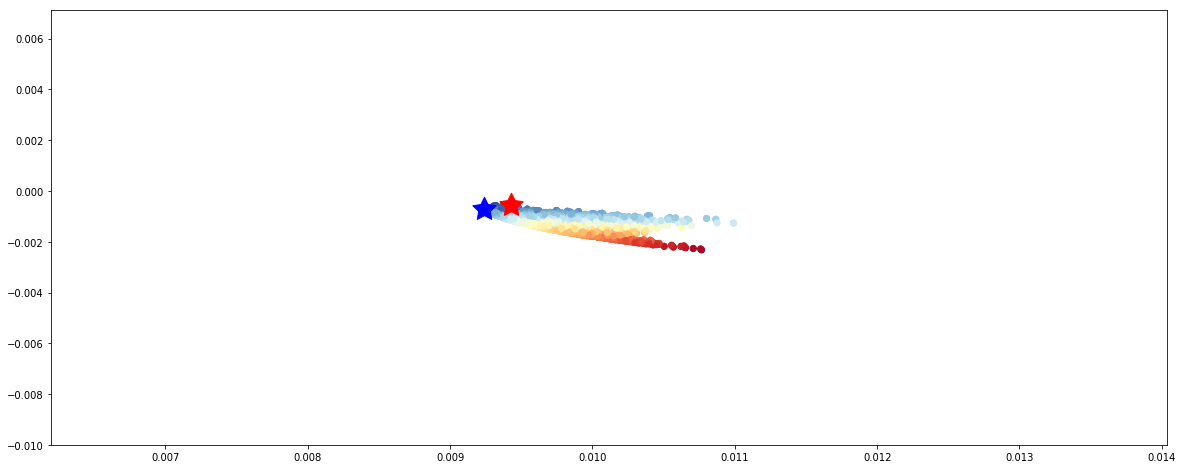

In [42]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
sim_frame.ret.head()
plt.figure(figsize = (20,8))
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
# plt.xlabel('Standard Deviation')
# plt.ylabel('Returns')
# plt.ylim(0,.003)
# plt.xlim(0.0075,0.012)
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')

#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()